In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

missing_values = ["N/A","N/a","na","NA",np.nan]
seattle_listings = pd.read_csv('C:/Users/pholoanaj/Downloads/NANODEGREE/SEATTLE/listings.csv',na_values=missing_values)
seattle_calendar = pd.read_csv('C:/Users/pholoanaj/Downloads/NANODEGREE/SEATTLE/calendar.csv',na_values=missing_values)

boston_listings = pd.read_csv('C:/Users/pholoanaj/Downloads/NANODEGREE/BOSTON/listings.csv',na_values=missing_values)
boston_calendar = pd.read_csv('C:/Users/pholoanaj/Downloads/NANODEGREE/BOSTON/calendar.csv',na_values=missing_values)

seattle_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6606,2023-09-18,f,$99.00,$99.00,30,1125
1,6606,2023-09-19,f,$99.00,$99.00,30,1125
2,6606,2023-09-20,f,$99.00,$99.00,30,1125
3,6606,2023-09-21,t,$99.00,$99.00,30,1125
4,6606,2023-09-22,t,$99.00,$99.00,30,1125


In [149]:
boston_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2023-09-16,f,$125.00,$125.00,29,1125
1,3781,2023-09-17,f,$125.00,$125.00,29,1125
2,3781,2023-09-18,f,$125.00,$125.00,29,1125
3,3781,2023-09-19,f,$125.00,$125.00,29,1125
4,3781,2023-09-20,f,$125.00,$125.00,29,1125


In [79]:
#Drop columns with missing values
seattle_listings = seattle_listings.dropna(how="all")
seattle_calendar = seattle_calendar.dropna(how="all")
seattle_reviews = seattle_reviews.dropna(how="all")
seattle_listings.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        991
reviews_per_month                  991
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1411
dtype: int64

In [141]:
boston_listings = boston_listings.dropna(how="all")
boston_calendar = boston_calendar.dropna(how="all")
boston_reviews = boston_reviews.dropna(how="all")
boston_listings.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [139]:
#Taking only useful columns for listings
seattle_listings = seattle_listings.reindex(columns=['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','number_of_reviews_ltm'])
seattle_listings.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.823000e+03,6.823000e+03,6823.000000,6823.000000,6823.000000,6823.000000,6823.000000,6823.000000
mean,3.525649e+17,1.499893e+08,193.958669,11.784552,67.317309,31.654258,188.426352,17.804485
std,3.974132e+17,1.653001e+08,275.409663,24.305508,105.959383,85.310449,128.247196,23.138789
min,6.606000e+03,2.536000e+03,13.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.790909e+07,1.821758e+07,108.000000,2.000000,3.000000,1.000000,72.000000,1.000000
50%,5.267547e+07,8.033375e+07,150.000000,2.000000,26.000000,2.000000,177.000000,8.000000
75%,7.538476e+17,2.415841e+08,220.000000,30.000000,85.000000,13.000000,320.000000,28.000000
max,9.820239e+17,5.360771e+08,10000.000000,999.000000,1319.000000,374.000000,365.000000,353.000000


In [144]:
boston_listings = boston_listings.reindex(columns=['id','name','host_id','host_name','neighbourhood','room_type','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','number_of_reviews_ltm'])
boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4033 entries, 0 to 4032
Data columns (total 12 columns):
id                                4033 non-null int64
name                              4033 non-null object
host_id                           4033 non-null int64
host_name                         4033 non-null object
neighbourhood                     4033 non-null object
room_type                         4033 non-null object
price                             4033 non-null int64
minimum_nights                    4033 non-null int64
number_of_reviews                 4033 non-null int64
calculated_host_listings_count    4033 non-null int64
availability_365                  4033 non-null int64
number_of_reviews_ltm             4033 non-null int64
dtypes: int64(8), object(4)
memory usage: 409.6+ KB


In [152]:
# Remove $ Sign from price and adjusted_price
seattle_calendar['price'] = pd.to_numeric(seattle_calendar['price'].replace('[\$,]', '', regex=True), errors='coerce')
seattle_calendar['adjusted_price'] = pd.to_numeric(seattle_calendar['adjusted_price'].replace('[\$,]', '', regex=True), errors='coerce')
boston_calendar['price'] = pd.to_numeric(boston_calendar['price'].replace('[\$,]', '', regex=True), errors='coerce')
boston_calendar['adjusted_price'] = pd.to_numeric(boston_calendar['adjusted_price'].replace('[\$,]', '', regex=True), errors='coerce')
boston_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2023-09-16,f,125.0,125.0,29,1125
1,3781,2023-09-17,f,125.0,125.0,29,1125
2,3781,2023-09-18,f,125.0,125.0,29,1125
3,3781,2023-09-19,f,125.0,125.0,29,1125
4,3781,2023-09-20,f,125.0,125.0,29,1125


In [153]:
seattle_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6606,2023-09-18,f,99.0,99.0,30,1125
1,6606,2023-09-19,f,99.0,99.0,30,1125
2,6606,2023-09-20,f,99.0,99.0,30,1125
3,6606,2023-09-21,t,99.0,99.0,30,1125
4,6606,2023-09-22,t,99.0,99.0,30,1125


In [155]:
# Convert the 'date' column to datetime format and extract month, year
seattle_calendar['date'] = pd.to_datetime(seattle_calendar['date'])
boston_calendar['date'] = pd.to_datetime(boston_calendar['date'])
seattle_calendar['month'] = seattle_calendar['date'].dt.month
boston_calendar['month'] = boston_calendar['date'].dt.month
seattle_calendar['year'] = seattle_calendar['date'].dt.year
boston_calendar['year'] = boston_calendar['date'].dt.year
seattle_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,year
0,6606,2023-09-18,f,99.0,99.0,30,1125,9,2023
1,6606,2023-09-19,f,99.0,99.0,30,1125,9,2023
2,6606,2023-09-20,f,99.0,99.0,30,1125,9,2023
3,6606,2023-09-21,t,99.0,99.0,30,1125,9,2023
4,6606,2023-09-22,t,99.0,99.0,30,1125,9,2023


In [156]:
boston_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,year
0,3781,2023-09-16,f,125.0,125.0,29,1125,9,2023
1,3781,2023-09-17,f,125.0,125.0,29,1125,9,2023
2,3781,2023-09-18,f,125.0,125.0,29,1125,9,2023
3,3781,2023-09-19,f,125.0,125.0,29,1125,9,2023
4,3781,2023-09-20,f,125.0,125.0,29,1125,9,2023


In [157]:
# Calculate the average price per night for each month
seattle_average_price_per_month = seattle_calendar.groupby(['year', 'month'])['price'].mean()
boston_average_price_per_month = boston_calendar.groupby(['year', 'month'])['price'].mean()
seattle_average_price_per_month.head()

year  month
2023  9        193.843628
      10       192.533431
      11       191.864722
      12       197.914896
2024  1        184.169518
Name: price, dtype: float64

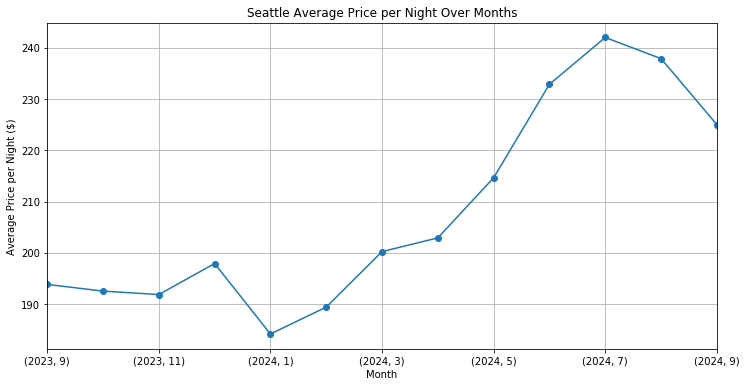

In [9]:
# Plotting Seattle
plt.figure(figsize=(12, 6))
seattle_average_price_per_month.plot(marker='o', linestyle='-')
plt.title('Seattle Average Price per Night Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price per Night ($)')
plt.grid(True)
plt.show()

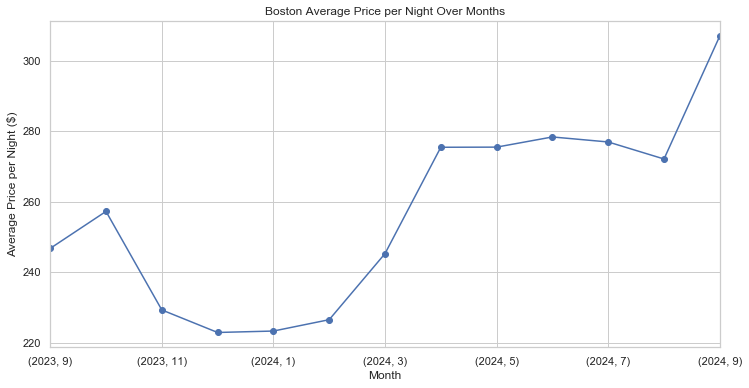

In [159]:
# Plotting Boston
plt.figure(figsize=(12, 6))
boston_average_price_per_month.plot(marker='o', linestyle='-')
plt.title('Boston Average Price per Night Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price per Night ($)')
plt.grid(True)
plt.show()

In [161]:
# Distribution of rooms Listings Across Seattle Neighborhoods

Seattle_neighborhood_counts = seattle_listings['neighbourhood_group'].value_counts().reset_index()
Seattle_neighborhood_counts.columns = ['Seattle_neighbourhood_group', 'Number of Listings']
Seattle_neighborhood_counts = Seattle_neighborhood_counts.sort_values(by='Number of Listings', ascending=False)
print(Seattle_neighborhood_counts)

   Seattle_neighbourhood_group  Number of Listings
0          Other neighborhoods                1394
1                     Downtown                 860
2                 Central Area                 624
3                 Capitol Hill                 604
4                   Queen Anne                 475
5                 West Seattle                 451
6                      Ballard                 418
7               Rainier Valley                 384
8                      Cascade                 297
9                  Beacon Hill                 294
10         University District                 252
11                   Northgate                 234
12                    Delridge                 218
13                   Lake City                 114
14                    Magnolia                 105
15                 Seward Park                  55
16                    Interbay                  44


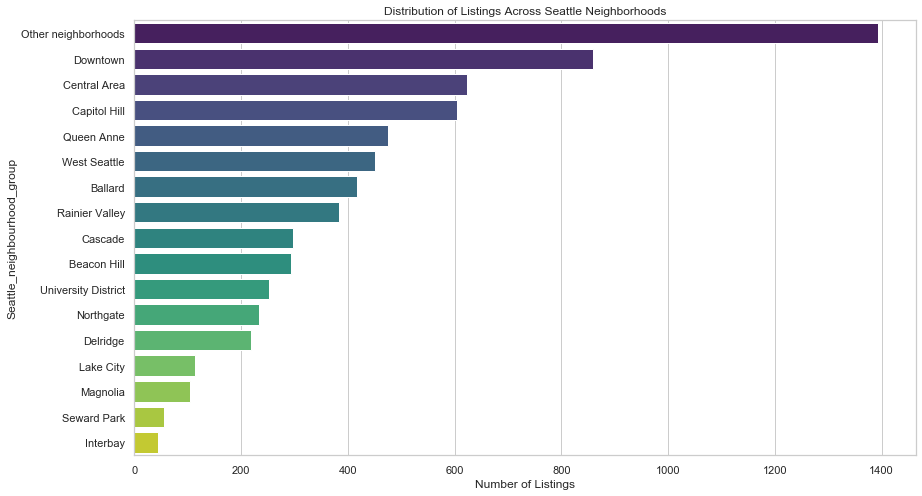

In [162]:
# Create Graph for Seattle
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Listings', y='Seattle_neighbourhood_group', data=Seattle_neighborhood_counts, palette='viridis')
plt.title('Distribution of Listings Across Seattle Neighborhoods')
plt.xlabel('Number of Listings')
plt.ylabel('Seattle_neighbourhood_group')
plt.show()

In [163]:
# Distribution of rooms Listings Across Boston Neighborhoods

Boston_neighborhood_counts = boston_listings['neighbourhood'].value_counts().reset_index()
Boston_neighborhood_counts.columns = ['Boston_neighbourhood', 'Number of Listings']
Boston_neighborhood_counts = Boston_neighborhood_counts.sort_values(by='Number of Listings', ascending=False)
print(Boston_neighborhood_counts)

       Boston_neighbourhood  Number of Listings
0                Dorchester                 493
1                  Downtown                 343
2                  Back Bay                 326
3                   Roxbury                 292
4                 South End                 286
5                  Brighton                 282
6             Jamaica Plain                 229
7               East Boston                 225
8                    Fenway                 214
9              South Boston                 188
10                  Allston                 183
11              Beacon Hill                 173
12                North End                 123
13                Chinatown                 100
14               Roslindale                  78
15              Charlestown                  77
16             Mission Hill                  69
17             West Roxbury                  64
18                 Mattapan                  61
19  South Boston Waterfront             

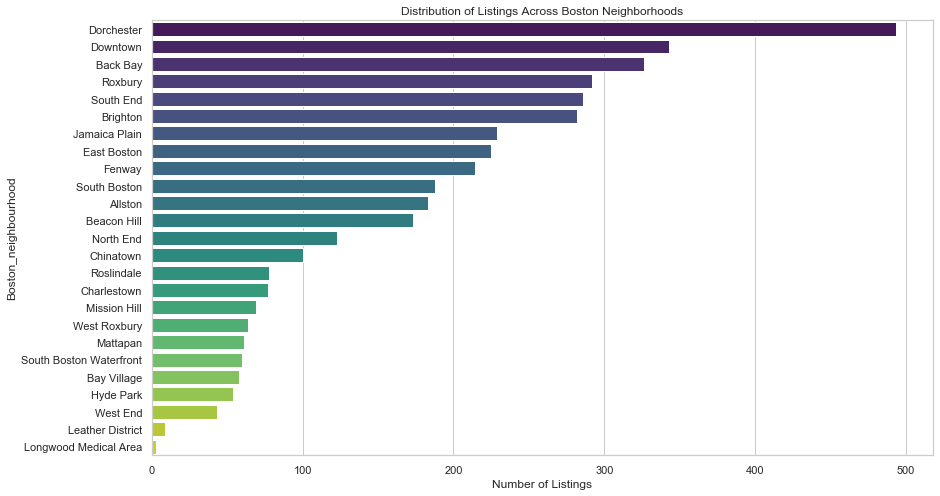

In [95]:
# Create Graph for Boston
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Listings', y='Boston_neighbourhood', data=Boston_neighborhood_counts, palette='viridis')
plt.title('Distribution of Listings Across Boston Neighborhoods')
plt.xlabel('Number of Listings')
plt.ylabel('Boston_neighbourhood')
plt.show()


In [165]:
# Calculate the average price per night in respective neighbourhoods and sort satrting with the cheapest
seattle_average_price_per_neighbourbood = seattle_listings.groupby(['neighbourhood_group'],as_index=False)['price'].mean().rename(columns={'price':'Avg_Price'})
boston_average_price_per_neighbourbood = boston_listings.groupby(['neighbourhood'],as_index=False)['price'].mean().rename(columns={'price':'Avg_Price'})

#seattle_average_price_per_neighbourbood = seattle_listings.groupby(['neighbourhood_group'])['price'].mean()
#boston_average_price_per_neighbourbood = boston_listings.groupby(['neighbourhood'])['price'].mean()
boston_average_price_per_neighbourbood = boston_average_price_per_neighbourbood.sort_values(by=['Avg_Price'],ascending=True)
seattle_average_price_per_neighbourbood = seattle_average_price_per_neighbourbood.sort_values(by=['Avg_Price'],ascending=True)
seattle_average_price_per_neighbourbood.head()

,neighbourhood_group,Avg_Price
10,Northgate,129.384615
5,Delridge,147.642202
7,Interbay,148.318182
1,Beacon Hill,158.680272
13,Rainier Valley,159.286458


In [166]:
boston_average_price_per_neighbourbood.head()

,neighbourhood,Avg_Price
14,Longwood Medical Area,99.000000
11,Hyde Park,125.518519
15,Mattapan,154.639344
19,Roxbury,158.945205
16,Mission Hill,161.826087


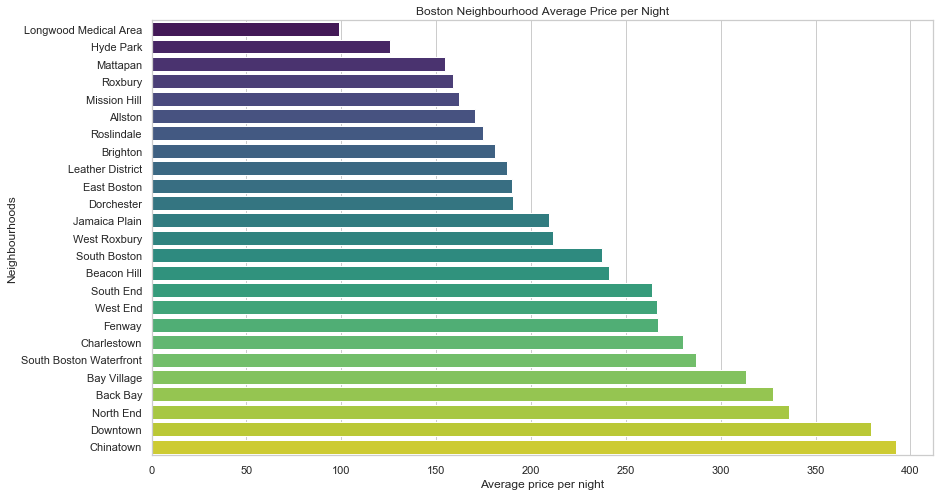

In [169]:
# Plotting Boston Neighbourhood Average Price per Night
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x='Avg_Price', y='neighbourhood', data=boston_average_price_per_neighbourbood, palette='viridis')
plt.title('Boston Neighbourhood Average Price per Night')
plt.xlabel('Average price per night')
plt.ylabel('Neighbourhoods')
plt.show()

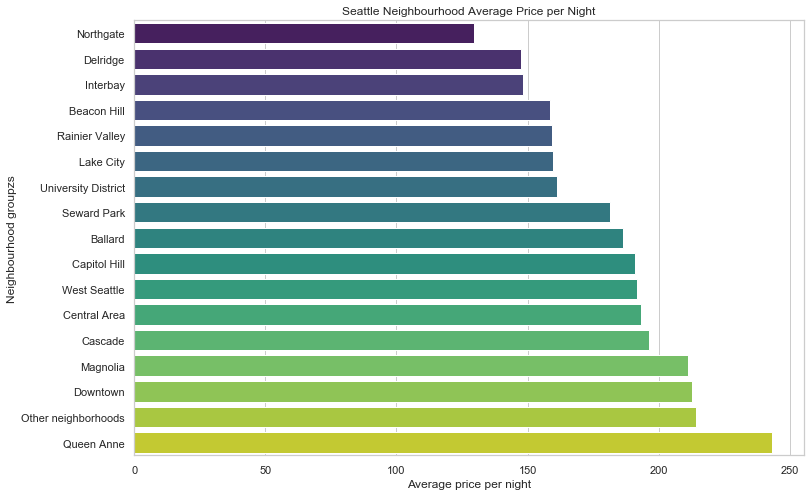

In [170]:
# Plotting Seattle Neighbourhood Average Price per Night

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Price', y='neighbourhood_group', data=seattle_average_price_per_neighbourbood, palette='viridis')
plt.title('Seattle Neighbourhood Average Price per Night')
plt.xlabel('Average price per night')
plt.ylabel('Neighbourhood groupzs')
plt.show()

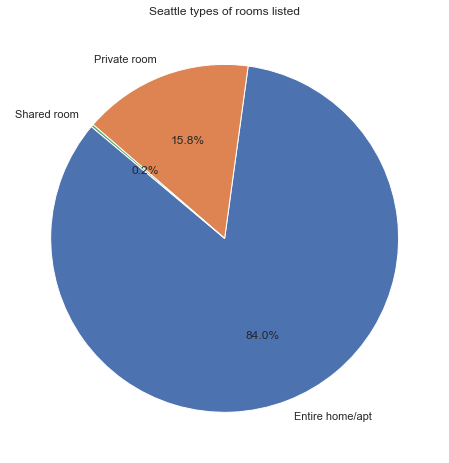

In [171]:
# Distribution of room types listed in Seattle
property_type_counts = seattle_listings['room_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Seattle types of rooms listed')
plt.show()

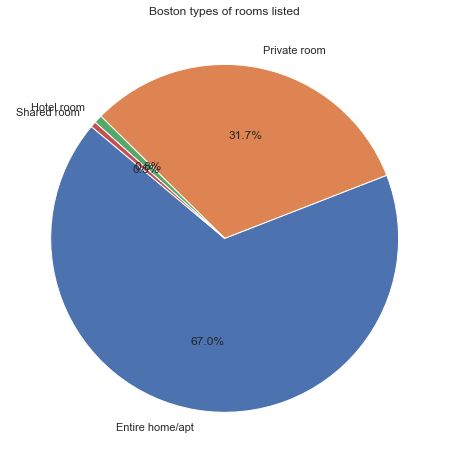

In [172]:
# Distribution of room types listed in Seattle
property_type_counts = boston_listings['room_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Boston types of rooms listed')
plt.show()